<a href="https://colab.research.google.com/github/FrankGangWang/AppliedML_Python_Coursera/blob/master/DNA_kmers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref:
https://www.theaidream.com/post/demystify-dna-sequencing-with-machine-learning-and-python

You can get the whole code in this Github repository:
https://github.com/nageshsinghc4/DNA-Sequence-Machine-learning


#Note:
You can tune k-mers both the **word length and the amount of overlap**. This allows you to determine how the DNA sequence information and vocabulary size will be important in your application. For example, if you use words of length 6, and there are 4 letters, you have a vocabulary of size 4096 possible words. You can then go on and create a bag-of-words model like you would in NLP.




In [3]:
human_datafile = 'https://raw.githubusercontent.com/nageshsinghc4/DNA-Sequence-Machine-learning/master/human_data.txt'
chimp_datafile = 'https://raw.githubusercontent.com/nageshsinghc4/DNA-Sequence-Machine-learning/master/chimp_data.txt'
dog_datafile = 'https://raw.githubusercontent.com/nageshsinghc4/DNA-Sequence-Machine-learning/master/dog_data.txt'

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
human_dna = pd.read_table(human_datafile)
chimp_dna = pd.read_table(chimp_datafile)
dog_dna = pd.read_table(dog_datafile)
human_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


Now we have all our data loaded, the next step is to convert a sequence of characters into k-mer words, default size = 6 (hexamers). The function Kmers_funct() will collect all possible overlapping k-mers of a specified length from any sequence string.


In [17]:
kmers_size = 6

def Kmers_funct(seq, size=6):
   return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]
#convert our training data sequences into short overlapping k-mers of length 6. Lets do that for each species of data we have using our Kmers_funct function.

human_dna['words'] = human_dna.apply(lambda x: Kmers_funct(x['sequence'], kmers_size), axis=1)
human_dna = human_dna.drop('sequence', axis=1)
chimp_dna['words'] = chimp_dna.apply(lambda x: Kmers_funct(x['sequence'], kmers_size), axis=1)
chimp_dna = chimp_dna.drop('sequence', axis=1)
dog_dna['words'] = dog_dna.apply(lambda x: Kmers_funct(x['sequence'], kmers_size), axis=1)
dog_dna = dog_dna.drop('sequence', axis=1)


In [18]:
#The DNA sequence is changed to lowercase, divided into all possible k-mer words of length 6, and ready for the next step.
human_dna.head()


,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


In [48]:
test_range = 10
print('human_dna type=', type(human_dna), 'human_dna shape=', human_dna.shape)
print('human_dna words len=\n', [len(k) for k in human_dna.iloc[0:test_range]['words']])
print('human_dna class=\n',human_dna.iloc[0:test_range]['class'])

human_dna type= <class 'pandas.core.frame.DataFrame'> human_dna shape= (4380, 2)
human_dna words len=
 [202, 676, 1681, 1201, 1432, 1681, 1618, 1432, 1618, 639]
human_dna class=
 0    4
1    4
2    3
3    3
4    3
5    3
6    3
7    3
8    3
9    3
Name: class, dtype: int64


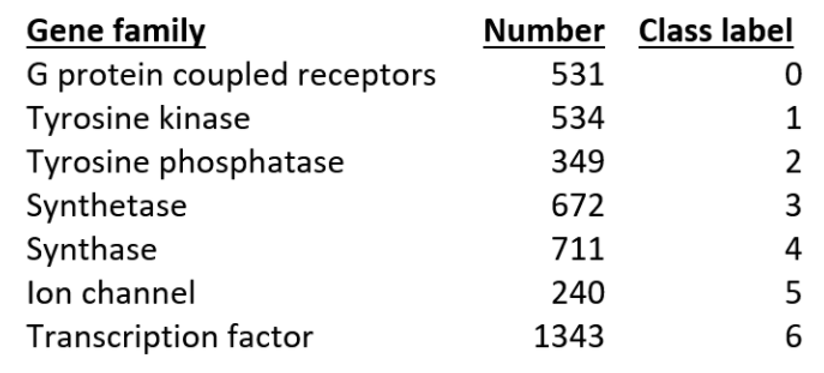

In [35]:
for k in range(7):
  print(k, np.sum(human_dna['class']==k))

0 531
1 534
2 349
3 672
4 711
5 240
6 1343


In [31]:
human_dna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4380 entries, 0 to 4379
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   4380 non-null   int64 
 1   words   4380 non-null   object
dtypes: int64(1), object(1)
memory usage: 68.6+ KB


In [30]:
human_dna.describe()

,class
count,4380.000000
mean,3.504566
std,2.132134
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,6.000000


We need to now convert the lists of k-mers for each gene into string sentences of words that can be used to create the Bag of Words model. We will make a target variable y to hold the class labels.


In [49]:
#do the same for chimp and dog
human_texts = list(human_dna['words'])
for item in range(len(human_texts)):
   human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = human_dna.iloc[:, 0].values # y_human for human_dna
#Now let's do the same for chimp and dog.
chimp_texts = list(chimp_dna['words'])
for item in range(len(chimp_texts)):
   chimp_texts[item] = ' '.join(chimp_texts[item])
#separate labels
y_chim = chimp_dna.iloc[:, 0].values # y_chim for chimp_dna
dog_texts = list(dog_dna['words'])
for item in range(len(dog_texts)):
   dog_texts[item] = ' '.join(dog_texts[item])
#separate labels
y_dog = dog_dna.iloc[:, 0].values  # y_dog for dog_dna

#So the target variable contains an array of class values.
#array([4, 4, 3, …, 6, 6, 6])


Convert our k-mer words into uniform length numerical vectors that represent counts for every k-mer in the vocabulary:

shapes
(4380, 232414)
(1682, 232414)
(820, 232414)


In [50]:
#Creating the Bag of Words model:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
#The n-gram size of 4 is previously determined by testing
# analyzer{‘word’, ‘char’, ‘char_wb’} or callable, default=’word’

X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)
X_dog = cv.transform(dog_texts)

#You may want to check the shape of each of these training data.
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


Example of N-gram such as unigram (“This”, “article”, “is”, “on”, “NLP”)  or bi-gram (‘This article’, ‘article is’, ‘is on’,’on NLP’).


cv.vocabulary_ has rows:\
0 atgccc tgcccc gcccca ccccaa\
1 tgcccc gcccca ccccaa cccaac\
2 gcccca ccccaa cccaac ccaact\
3 ccccaa cccaac ccaact caacta\
4 cccaac ccaact caacta aactaa\
5 ccaact caacta aactaa actaaa\
6 caacta aactaa actaaa ctaaat\
7 aactaa actaaa ctaaat taaata\
8 actaaa ctaaat taaata aaatac\
9 ctaaat taaata aaatac aatact\

In [76]:
#[k for k in cv.vocabulary_ if k.value()==60202]
#type(cv.vocabulary_)
for i, k in enumerate(cv.vocabulary_):
   if i < 10:
     print(i, k)

0 atgccc tgcccc gcccca ccccaa
1 tgcccc gcccca ccccaa cccaac
2 gcccca ccccaa cccaac ccaact
3 ccccaa cccaac ccaact caacta
4 cccaac ccaact caacta aactaa
5 ccaact caacta aactaa actaaa
6 caacta aactaa actaaa ctaaat
7 aactaa actaaa ctaaat taaata
8 actaaa ctaaat taaata aaatac
9 ctaaat taaata aaatac aatact


In [67]:
# type of X is compressed sparse row (CSR) or compressed row storage (CRS) or Yale format
#represents a matrix M by three (one-dimensional) arrays, that respectively contain
#nonzero values, the extents of rows, and column indices.

type(X), X.shape, X[0].toarray().shape


(scipy.sparse._csr.csr_matrix, (4380, 232414), (1, 232414))

In [53]:
type(cv.vocabulary_), len(cv.vocabulary_)

(dict, 232414)

So, for humans we have 4380 genes converted into uniform length feature vectors of 4-gram k-mer (length 6) counts. For chimps and dogs, we have the same number of features with 1682 and 820 genes respectively.


So now that we know how to transform our DNA sequences into uniform length numerical vectors in the form of k-mer counts and ngrams, we can now go ahead and build a classification model that can predict the DNA sequence function based only on the sequence itself.


Here I will use the human data to train the model, holding out 20% of the human data to test the model. Then we can challenge the model’s generalizability by trying to predict sequence function in other species (the chimpanzee and dog).


Next, train/test split human dataset and build simple multinomial naive Bayes classifier.


You might want to do some parameter tuning and build a model with different ngram sizes, here I’ll go ahead with an ngram size of 4 and a model alpha of 0.1.





In [54]:
# Splitting the human dataset into the training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y_human,
                                                   test_size = 0.20,
                                                   random_state=42)

### Multinomial Naive Bayes Classifier ###
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [55]:
#Now let’s make predictions on the human hold-out test set and see how it performs on test data.

y_pred = classifier.predict(X_test)



Okay, so let’s look at some model performance metrics like the confusion matrix, accuracy, precision, recall, and f1 score. We are getting really good results on our unseen data, so it looks like our model did not overfit the training data.




In [56]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Confusion matrix for predictions on human test DNA sequence\n")

print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

def get_metrics(y_test, y_predicted):
   accuracy = accuracy_score(y_test, y_predicted)
   precision = precision_score(y_test, y_predicted, average='weighted')
   recall = recall_score(y_test, y_predicted, average='weighted')
   f1 = f1_score(y_test, y_predicted, average='weighted')
   return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)

print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix for predictions on human test DNA sequence

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


Let’s see how our model performs on the DNA sequences from other species. First, we’ll try the Chimpanzee, which we would expect to be very similar to humans. then the Dog DNA sequences.


In [57]:
# Predicting the chimp, dog and worm sequences
y_pred_chimp = classifier.predict(X_chimp)

#Check the accuracy matrix:
# performance on chimpanzee genes
print("Confusion matrix for predictions on Chimpanzee test DNA sequence\n")
print(pd.crosstab(pd.Series(y_chim, name='Actual'), pd.Series(y_pred_chimp, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_chim, y_pred_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


Confusion matrix for predictions on Chimpanzee test DNA sequence

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


In [58]:
#Let us now do predictions on Dog test DNA sequence:


y_pred_dog = classifier.predict(X_dog)

#Check the accuracy matrix:


# performance on dog genes
print("Confusion matrix for predictions on Dog test DNA sequence\n")
print(pd.crosstab(pd.Series(y_dog, name='Actual'), pd.Series(y_pred_dog, name='Predicted')))
accuracy, precision, recall, f1 = get_metrics(y_dog, y_pred_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))


Confusion matrix for predictions on Dog test DNA sequence

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925


The model seems to produce good results on human data. It also does on chimpanzees which is because the chimpanzees and humans share the same genetic hierarchy. The performance of the dog is not quite as good which is because the dog is more diverging from humans than the chimpanzee.

Conclusion
In this article, we learned how to interpret DNA sequence data, visualize it, and how different encoding techniques can be used to represent these sequences into matrices. Finally, we created a Naive Byes model that can detect the gene family in test data of humans, dogs, and Chimpanzees.

